In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.stats as stats
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [2]:
credit_data = pd.read_csv('creditcard_2023.csv',index_col="id")
credit_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Null Values Check

In [3]:
credit_data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Class Balance Check

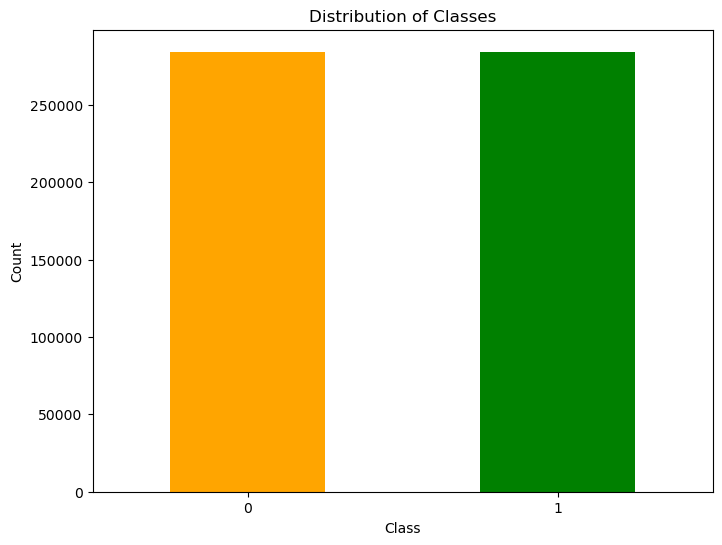

In [4]:
class_counts = credit_data['Class'].value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['orange', 'green'])
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Metrics Utility Function

In [3]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,accuracy_score
def get_metrics(y_test,y_pred):
    print("Test Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ",precision_score(y_test, y_pred))
    print("F1 Score: ",f1_score(y_test, y_pred))
    print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

### Train-Test Split

In [4]:
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Dimensionality Reduction - Feature Selection

In [6]:
# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Step 2: Train a Random Forest model to obtain feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Feature Importances:
[9.16315838e-03 2.15271950e-02 3.75024011e-02 1.47002377e-01
 9.54950912e-03 6.99704981e-03 4.39983221e-02 1.04730811e-02
 1.20121598e-02 1.66411763e-01 8.84214248e-02 1.04733840e-01
 6.26449177e-03 1.37692572e-01 5.55171517e-03 5.39715749e-02
 5.84245804e-02 1.04677975e-02 8.14144414e-03 6.08919364e-03
 1.49422593e-02 4.32544699e-03 5.32138193e-03 4.89509070e-03
 5.50077716e-03 5.62795888e-03 7.46252928e-03 7.46252275e-03
 6.63825857e-05]


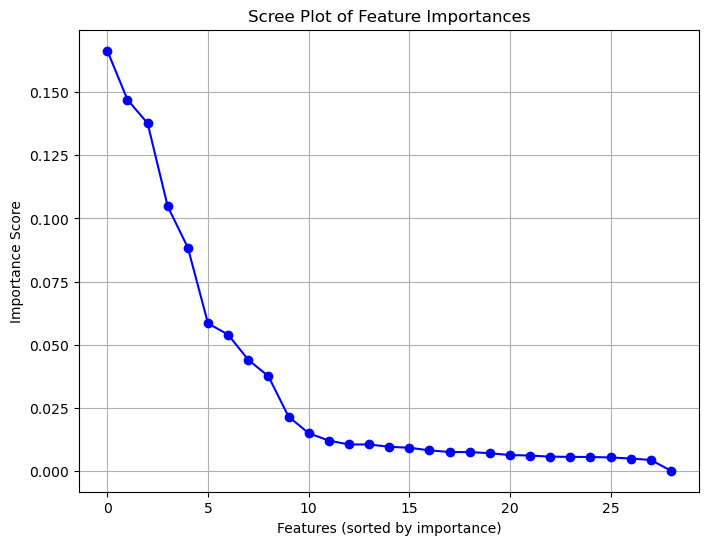

In [8]:
# Step 3: Print feature importances
feature_importances = rf_model.feature_importances_
print("Feature Importances:")
print(feature_importances)
# Step 4: Plot a scree plot
plt.figure(figsize=(8, 6))
plt.plot(sorted(feature_importances, reverse=True), marker='o', linestyle='-', color='b')
plt.title('Scree Plot of Feature Importances')
plt.xlabel('Features (sorted by importance)')
plt.ylabel('Importance Score')
plt.grid(True)
plt.show()

In [9]:
threshold = np.sort(feature_importances)[-10]
sfm = SelectFromModel(rf_model, threshold=threshold)
X_train_selected = sfm.fit_transform(X_train_scaled, y_train)
X_test_selected = sfm.transform(X_test_scaled)

In [10]:
selected_feature_names = X.columns[sfm.get_support()]

print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')


### Checking the performance of Feature Selection Dataset on Baseline Model

In [13]:
log_reg_model1 = LogisticRegression(max_iter=1000)
log_reg_model1.fit(X_train_selected,y_train)

LogisticRegression(max_iter=1000)

In [14]:
log_reg_pred = log_reg_model1.predict(X_test_selected)
get_metrics(y_test,log_reg_pred)

Test Accuracy:  0.9599651794664369
Precision:  0.9779544501376707
F1 Score:  0.9592816834649471
Confusion Matrix:  [[55541  1209]
 [ 3344 53632]]


### Dimensionality Reduction - PCA

In [15]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [16]:
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

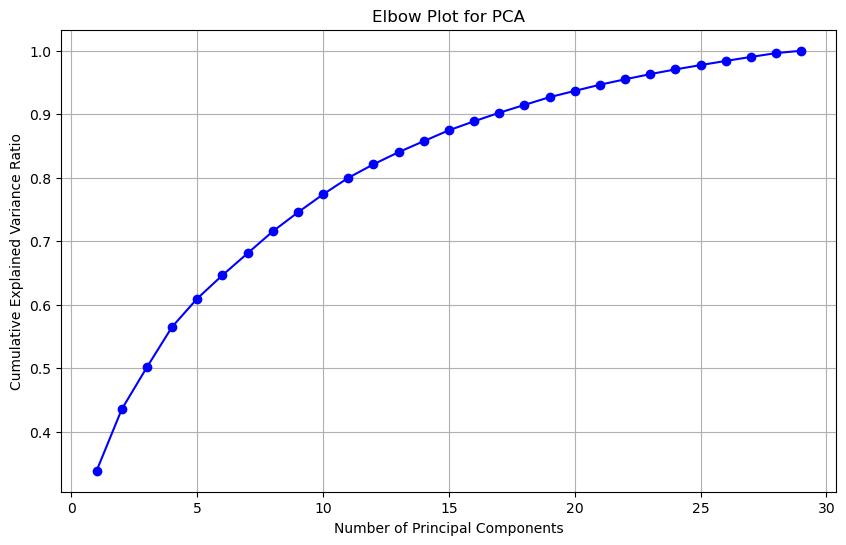

In [17]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create an elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [18]:
k = 17
X_pca_selected = X_pca[:, :k]

# Optionally, you can analyze the explained variance to understand how much information is retained
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Explained Variance Ratio:", explained_variance_ratio)
print(f"Cumulative Explained Variance (k={k}): {cumulative_variance_ratio[k-1]:.4f}")

# Create a DataFrame with the principal components
columns = [f"PC{i+1}" for i in range(k)]
df_pca = pd.DataFrame(data=X_pca_selected, columns=columns)

Explained Variance Ratio: [0.33872158 0.09688719 0.06618998 0.06346626 0.04459286 0.03666183
 0.03459292 0.03441276 0.02999273 0.02833916 0.02597564 0.02131675
 0.01909455 0.0173951  0.01708433 0.0141626  0.01343088 0.01233759
 0.01219622 0.009879   0.00972481 0.0085329  0.00815503 0.00744716
 0.00675692 0.00656616 0.00629288 0.00601301 0.00378119]
Cumulative Explained Variance (k=17): 0.9023


In [19]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, y, test_size=0.2, random_state=42)

### Checking the performance of PCA Dataset on Baseline Model

In [20]:
log_reg_model2 = LogisticRegression(max_iter=1000)
log_reg_model2.fit(X_train_pca,y_train)

LogisticRegression(max_iter=1000)

In [21]:
log_reg_pred2 = log_reg_model2.predict(X_test_pca)
get_metrics(y_test_pca,log_reg_pred2)

Test Accuracy:  0.9589451840388302
Precision:  0.9753194118823038
F1 Score:  0.9583121277868553
Confusion Matrix:  [[55392  1358]
 [ 3311 53665]]


### Independence testing of "Amount" Column

In [22]:
fraud_amounts = credit_data.loc[credit_data['Class'] == 1, 'Amount']
non_fraud_amounts = credit_data.loc[credit_data['Class'] == 0, 'Amount']

In [23]:
statistic, p_value = stats.mannwhitneyu(fraud_amounts, non_fraud_amounts)

alpha = 0.05

print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in amounts between fraud and non-fraud transactions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in amounts between fraud and non-fraud transactions.")

Mann-Whitney U Statistic: 40523046082.5
P-value: 0.08815506456455785
Fail to reject the null hypothesis. There is no significant difference in amounts between fraud and non-fraud transactions.


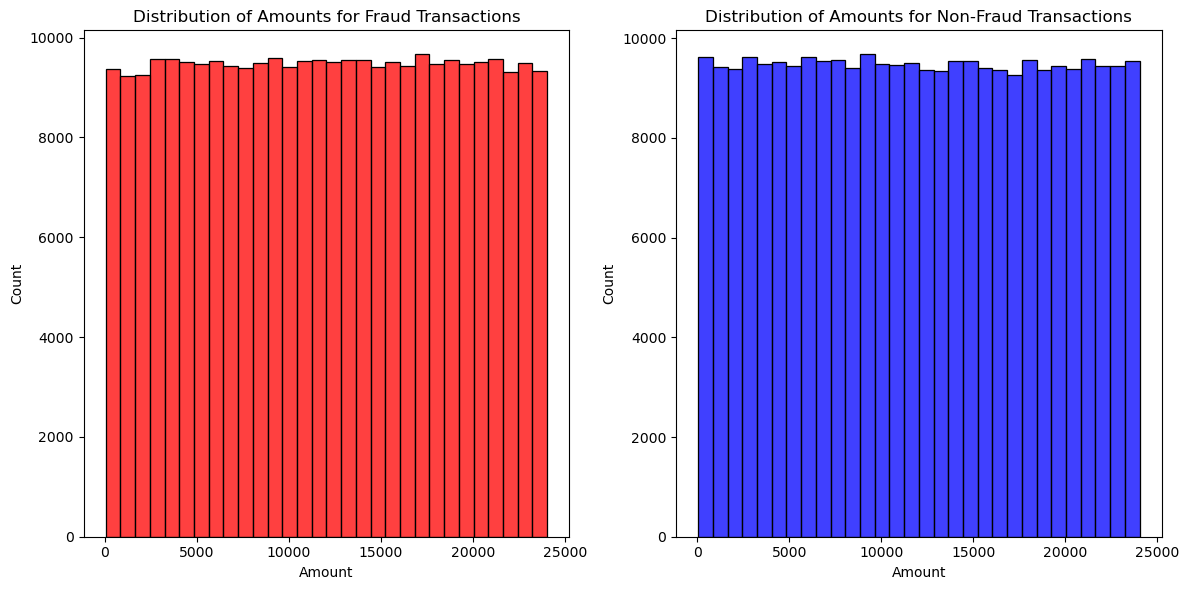

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Fraud Transactions
sns.histplot(fraud_amounts, bins=30, kde=False, color='red', ax=ax1)
ax1.set_xlabel('Amount')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Amounts for Fraud Transactions')

# Plot for Non-Fraud Transactions
sns.histplot(non_fraud_amounts, bins=30, kde=False, color='blue', ax=ax2)
ax2.set_xlabel('Amount')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Amounts for Non-Fraud Transactions')

plt.tight_layout()

plt.show()

## Classification Models

### Logistic Regression

In [25]:
log_reg_model1 = LogisticRegression(max_iter=1000)
log_reg_model1.fit(X_train_selected,y_train)

LogisticRegression(max_iter=1000)

In [26]:
log_reg_pred = log_reg_model1.predict(X_test_selected)
get_metrics(y_test,log_reg_pred)

Test Accuracy:  0.9599651794664369
Precision:  0.9779544501376707
F1 Score:  0.9592816834649471
Confusion Matrix:  [[55541  1209]
 [ 3344 53632]]


### K-Nearest Neighbours

In [27]:
KNN_model = KNeighborsClassifier(n_neighbors=10)

In [28]:
KNN_model.fit(X_train_selected,y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
KNN_pred = KNN_model.predict(X_test_selected)
get_metrics(y_test,KNN_pred)

Test Accuracy:  0.9973620807906723
Precision:  0.9947622040645296
F1 Score:  0.997374225396492
Confusion Matrix:  [[56450   300]
 [    0 56976]]


### Random-Forest Classifier

In [30]:
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Replace with your chosen classifier
RF_classifier.fit(X_train_selected, y_train)
RF_pred = RF_classifier.predict(X_test_selected)
get_metrics(y_test,RF_pred)

Test Accuracy:  0.9997625872711605
Precision:  0.9995613958139616
F1 Score:  0.9997631059442861
Confusion Matrix:  [[56725    25]
 [    2 56974]]


In [31]:
X_train_selected_df = pd.DataFrame(X_train_selected, columns=['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'])  # Replace with actual feature names
X_test_selected_df = pd.DataFrame(X_test_selected, columns=['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'])  # Replace with actual feature names
y_train_df = pd.DataFrame({'Class': y_train})
y_test_df = pd.DataFrame({'Class': y_test})

## Anomaly Detection

<h3>Extracting the non-fraud data 

In [34]:
x_train = pd.concat([X_train_selected_df,y_train_df], axis=1)
x_train

,V2,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,0.258267,-0.350112,0.805699,-0.081985,-0.244261,0.585588,-0.583373,-0.708119,-0.296001,-0.368420,1
1,0.885542,-1.101482,1.184015,-0.628918,-0.891281,1.085265,-1.197058,-1.116212,-0.969169,-0.846299,1
2,0.176296,-0.477150,-0.006199,-0.226751,-0.557557,0.914718,-0.976213,-1.181056,-0.956306,-0.952772,1
3,-0.470973,2.492266,-0.415108,0.211097,0.471432,-1.631645,1.259970,0.123190,0.046376,0.682463,0
4,-0.574234,-0.252418,-1.009704,0.279503,0.638240,-0.603385,0.902407,1.010024,0.366220,0.327848,0
...,...,...,...,...,...,...,...,...,...,...,...
454899,-0.817010,0.940208,-1.305942,0.241876,0.226563,0.071581,1.883148,0.736602,0.322040,0.367059,0
454900,-0.395999,0.073640,-1.321759,0.282927,0.351620,-0.889150,0.866645,0.933930,0.500894,0.301394,0
454901,-0.240832,-0.806786,0.966037,-1.072630,-1.064006,1.430046,-1.289472,-1.297845,-1.455102,-1.541265,1
454902,-0.130149,1.505652,-0.413064,0.864421,0.511333,-0.860830,0.630806,0.691261,0.380930,0.280276,0


In [35]:
non_fraud_train = x_train[x_train['Class']==0]
non_fraud_train

,V2,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
3,-0.470973,2.492266,-0.415108,0.211097,0.471432,-1.631645,1.259970,0.123190,0.046376,0.682463,0
4,-0.574234,-0.252418,-1.009704,0.279503,0.638240,-0.603385,0.902407,1.010024,0.366220,0.327848,0
5,-0.690995,0.620787,-0.699791,0.212291,0.879648,0.214704,2.001494,0.742794,-0.599816,0.956339,0
6,-0.201481,0.651818,-0.981374,0.758744,0.503662,-0.184964,1.098574,0.956897,0.491022,0.279300,0
9,-1.510886,0.473512,-1.420373,0.494731,-0.018134,-0.850026,1.336018,0.721606,0.082701,0.448652,0
...,...,...,...,...,...,...,...,...,...,...,...
454898,-0.456169,2.494238,-1.744935,0.333747,0.570851,0.102682,0.443045,0.555446,1.770121,0.426710,0
454899,-0.817010,0.940208,-1.305942,0.241876,0.226563,0.071581,1.883148,0.736602,0.322040,0.367059,0
454900,-0.395999,0.073640,-1.321759,0.282927,0.351620,-0.889150,0.866645,0.933930,0.500894,0.301394,0
454902,-0.130149,1.505652,-0.413064,0.864421,0.511333,-0.860830,0.630806,0.691261,0.380930,0.280276,0


In [36]:
x_non_fraud_train = non_fraud_train.iloc[:, :-1]

In [37]:
x_non_fraud_train

,V2,V3,V4,V7,V10,V11,V12,V14,V16,V17
3,-0.470973,2.492266,-0.415108,0.211097,0.471432,-1.631645,1.259970,0.123190,0.046376,0.682463
4,-0.574234,-0.252418,-1.009704,0.279503,0.638240,-0.603385,0.902407,1.010024,0.366220,0.327848
5,-0.690995,0.620787,-0.699791,0.212291,0.879648,0.214704,2.001494,0.742794,-0.599816,0.956339
6,-0.201481,0.651818,-0.981374,0.758744,0.503662,-0.184964,1.098574,0.956897,0.491022,0.279300
9,-1.510886,0.473512,-1.420373,0.494731,-0.018134,-0.850026,1.336018,0.721606,0.082701,0.448652
...,...,...,...,...,...,...,...,...,...,...
454898,-0.456169,2.494238,-1.744935,0.333747,0.570851,0.102682,0.443045,0.555446,1.770121,0.426710
454899,-0.817010,0.940208,-1.305942,0.241876,0.226563,0.071581,1.883148,0.736602,0.322040,0.367059
454900,-0.395999,0.073640,-1.321759,0.282927,0.351620,-0.889150,0.866645,0.933930,0.500894,0.301394
454902,-0.130149,1.505652,-0.413064,0.864421,0.511333,-0.860830,0.630806,0.691261,0.380930,0.280276


<h3>Isolation Forest Model

In [38]:
# Train Isolation Forest on non-fraud data
isolation_forest = IsolationForest(contamination='auto') 
isolation_forest.fit(x_non_fraud_train)

IsolationForest()

In [39]:
y_test_predict = isolation_forest.predict(X_test_selected)

/Users/prashantharipirala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [40]:
set(y_test_predict)

{-1, 1}

In [41]:
y_test_predict = np.where(y_test_predict == -1, 1, 0)

In [42]:
y_test_predict

array([1, 1, 0, ..., 1, 1, 0])

In [43]:
y_test_predict = pd.DataFrame(y_test_predict, columns=['Class'])

In [44]:
get_metrics(y_test,y_test_predict)

Test Accuracy:  0.9174243356840125
Precision:  0.9387089041727361
F1 Score:  0.9155553956963915
Confusion Matrix:  [[53426  3324]
 [ 6067 50909]]


<h3> One-Class SVM Model

In [45]:
# Train One-Class SVM on non-fraud data
one_class_svm = OneClassSVM(nu=0.05) 
one_class_svm.fit(x_non_fraud_train)

OneClassSVM(nu=0.05)

In [46]:
y_test_predict = one_class_svm.predict(X_test_selected)

/Users/prashantharipirala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


In [47]:
set(y_test_predict)

{-1, 1}

In [48]:
y_test_predict = np.where(y_test_predict == -1, 1, 0)        

In [49]:
y_test_predict = pd.DataFrame(y_test_predict, columns=['Class'])

In [50]:
get_metrics(y_test,y_test_predict)

Test Accuracy:  0.9190246733376712
Precision:  0.9463121110758134
F1 Score:  0.916652336431681
Confusion Matrix:  [[53877  2873]
 [ 6336 50640]]


## Hybrid Model

In [11]:
classifier = RandomForestClassifier()
classifier_pipeline = Pipeline([
    ('classifier', classifier)
])

In [12]:
classifier_pipeline.fit(X_train_selected, y_train)
X_train_class_output = classifier_pipeline.predict_proba(X_train_selected)[:, 0]  # Use probability of positive class
X_test_class_output = classifier_pipeline.predict_proba(X_test_selected)[:, 0]

In [13]:
unique_values, counts = np.unique(X_train_class_output, return_counts=True)

value_counts_dict = dict(zip(unique_values, counts))

print("Value Counts:")
print(value_counts_dict)

Value Counts:
{0.0: 216475, 0.01: 5883, 0.02: 2090, 0.03: 1062, 0.04: 598, 0.05: 369, 0.06: 277, 0.07: 171, 0.08: 112, 0.09: 78, 0.1: 57, 0.11: 49, 0.12: 26, 0.13: 24, 0.14: 21, 0.15: 17, 0.16: 11, 0.17: 6, 0.18: 4, 0.19: 4, 0.2: 1, 0.21: 1, 0.22: 1, 0.24: 1, 0.3: 1, 0.54: 1, 0.59: 2, 0.6: 2, 0.61: 2, 0.62: 4, 0.63: 1, 0.64: 2, 0.65: 2, 0.66: 4, 0.67: 6, 0.68: 5, 0.69: 2, 0.7: 2, 0.71: 2, 0.72: 9, 0.73: 7, 0.74: 5, 0.75: 8, 0.76: 6, 0.77: 8, 0.78: 15, 0.79: 13, 0.8: 8, 0.81: 9, 0.82: 17, 0.83: 21, 0.84: 24, 0.85: 21, 0.86: 34, 0.87: 55, 0.88: 56, 0.89: 52, 0.9: 88, 0.91: 122, 0.92: 147, 0.93: 213, 0.94: 332, 0.95: 437, 0.96: 812, 0.97: 1386, 0.98: 3261, 0.99: 12353, 1.0: 208009}


In [14]:
anomaly_detector = OneClassSVM(nu=0.05)
anomaly_detector.fit(X_train_class_output.reshape(-1, 1))

OneClassSVM(nu=0.05)

In [15]:
X_test_anomaly_output = anomaly_detector.predict(X_test_class_output.reshape(-1, 1))

In [16]:
np.unique(X_test_anomaly_output)

array([-1,  1])

In [17]:
final_predictions = (X_test_anomaly_output == -1).astype(int)

In [18]:
get_metrics(y_test,final_predictions)

Test Accuracy:  0.5404920598631799
Precision:  0.5230321610591474
F1 Score:  0.6721539793472942
Confusion Matrix:  [[ 7898 48852]
 [ 3406 53570]]
